In [10]:
from random import sample
from math import comb,perm

1. Într-o urn  sunt 5 bile ro³ii, 3 bile albastre ³i 2 bile verzi. Se extrag aleator f r  returnare 3
bile din urn . Se consider  urm toarele evenimente asociate acestui experiment: A: cel puµin o bil 
extras  este ro³ie  ³i B: toate bilele extrase au aceea³i culoare. 
i) Estimat, i P(B|A) prin simul ri repetate.

In [11]:
# PRIN SIMULARI REPETATE
lista = ["rosu","albastru","verde"]
count_rosie = 0
count_toate_rosii = 0
repetitii = 10000
for i in range(repetitii):
    extrase = sample(lista,counts=[5,3,2],k=3);
    if("rosu" in extrase):
        count_rosie +=1
        if(len(set(extrase)) == 1):
            count_toate_rosii += 1
print((count_toate_rosii/count_rosie)*100)

9.211962453612749


2. PROB TEORETICA = COMB(5,3) / COMB(10,3) CF/CP

In [12]:
prob_teoretica_ab = comb(5,3)/comb(10,3)
prob_teoretica_a = 1- prob_teoretica_ab
prob_b_cond_a_teoretica=prob_teoretica_ab/prob_teoretica_a
print((prob_b_cond_a_teoretica)*100)



9.090909090909092


Se simuleaz  aruncarea unui zar de 500 de ori. A s,at, i histograma frecvent, elor relative ale
numerelor obt, inute s, i barele corespunz toare probabilit t, ilor teoretice, înlocuind semnele de întrebare
din codul urm tor:

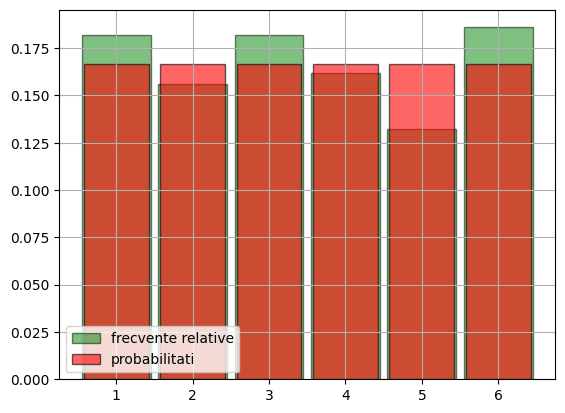

In [13]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend
# nr random in range 1-6
data = [randrange(1,7) for _ in range(500)]
# centreaza marginile
bin_edges = [k+0.5 for k in range(7)]
# histograma in sine
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')
# distribuirea probab teoretice
distribution = dict([(i,1/6) for i in range(1,7)])
# bara
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()

a) Generati o lista de 1000 de valori pentru X.


In [7]:
from scipy.stats import binom
n,p = 5,0.6
x = binom.rvs(n,p,size=1000)

b) Afișati histograma frecventelor relative si barele corespunzatoare valorilor teoretice.

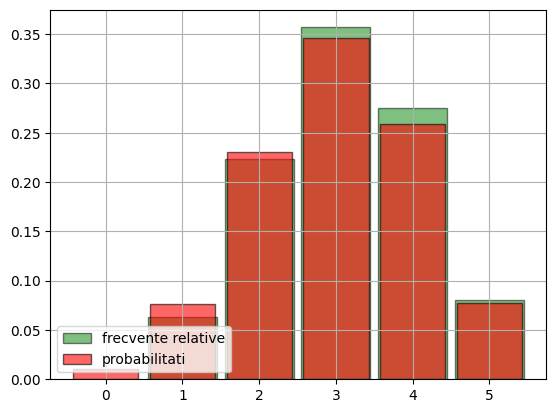

In [8]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend
# s ar putea sa fie 0.5

n,p = 5,0.6
x = binom.rvs(n,p,size=1000)
# centreaza marginile
bin_edges = [k+0.5 for k in range(6)]
# histograma in sine
hist(x, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')
# distribuirea probab teoretice
distribution = dict([(i,binom.pmf(i,n,p)) for i in range(6)])
# bara
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()

c) Estimati probabilitatea P(2 < X ≤ 5) si afișati valoarea teoretica.



In [9]:
n,p = 5,0.6
nr_sim=10000
x = binom.rvs(n,p,size=nr_sim)

print("p(2<X<=5) elastica este", sum([(2<k)&(k<=5) for k in x])/nr_sim)
print("P(2<X<=5) teoretica este",binom.cdf(5,n,p)-binom.cdf(2,n,p))


p(2<X<=5) elastica este 0.686
P(2<X<=5) teoretica este 0.68256


## La repetitii ai distributie, binomiala de obicei
## binom.rvs => returneaza lista cu elem generate aleator cu returnare
## x = binom.rvs(n,p,size) # n = cate extrageri
                    # p = rata de succes
                    # size = nr repetitii
x = vector de rate de succes
.pmf(k,n,p) # n = cate extrageri
            # p = rata de succes
            # k = cazu part calculat acum
returneaza prob in cazu k
.cdf() # probabilitatea acumulativa folosit pt calculat intre intervale
binom.cdf(5,n,p)-binom.cdf(2,n,p)) # prob acumulata pt toate 5 - pana la 2 => prob intre 2 si 5

4. rand range intre 1 si 7 de 3 ori
   => un vector care ti da suma fetelor 
   asta se repeta de n ori 
data este suma astora repetata de n ori


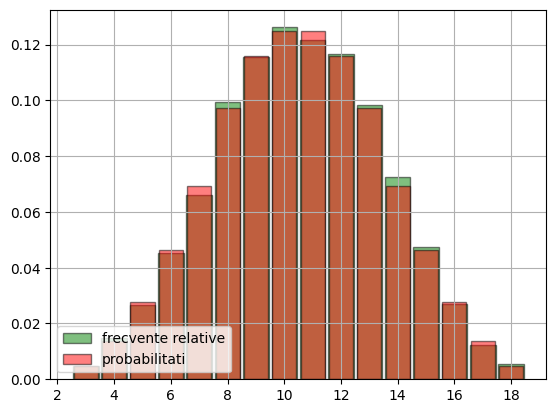

In [49]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend

total_outcomes = 6 ** 3  # moduri de a arunca 3 zaruri
sum_counts = {i: 0 for i in range(3, 19)} # dictionar de contorizare sume
# Toate modurile de a arunca 3 zaruri
for roll1 in range(1, 7):
    for roll2 in range(1, 7):
        for roll3 in range(1, 7):
            current_sum = roll1 + roll2 + roll3 
            sum_counts[current_sum] += 1 

# impartim configuratiile posibile de 3 zaruri ce au suma s la toate config de 3 zaruri
sum_probabilities = {s: count / total_outcomes for s, count in sum_counts.items()}

 
data = []
nr_sim = 10000

for _ in range(nr_sim):
    x = [randrange(1,7) for _ in range(3)]
    data.append(sum(nr for nr in x))

bin_edges = [k - 0.5 for k in range(3, 20)]
hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
alpha = 0.5, label = 'frecvente relative')


distribution = dict([(i,sum_probabilities[i]) for i in range(3,19)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.5, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()
# am calculat manual probabilitatea pt fiecare suma
# pt binom iti tr o rata de succes statica
# noi aveam la aialalta 60% ca oricate numere luai era succes
# dar aici ai o rata de succes diferita pt fiecare suma